In [20]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

In [21]:
np.random.seed(0)

In [22]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [23]:
assert(X_train.shape[0] == y_train.shape[0]), 'The number of images is not equal to the number of labels'
assert(X_test.shape[0] == y_test.shape[0]), 'The number of images is not equal to the number of labels'
assert(X_train.shape[1:] == (28,28)), 'The dimensions of the images are not 28x28'
assert(X_test.shape[1:] == (28,28)), 'The dimensions of the images are not 28x28'

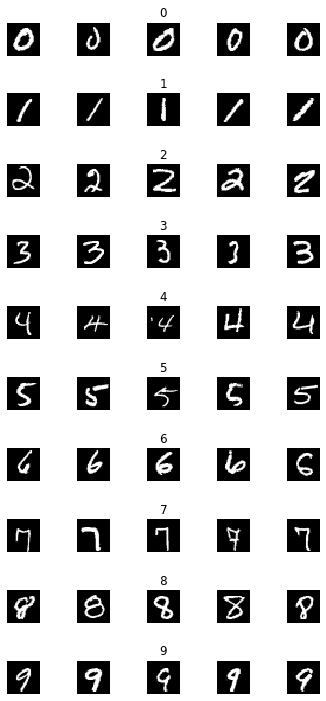

In [24]:
num_of_samples = []

cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected-1)), :, :], cmap=plt.get_cmap('gray'))
        axs[j][i].axis('off')
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of Images')

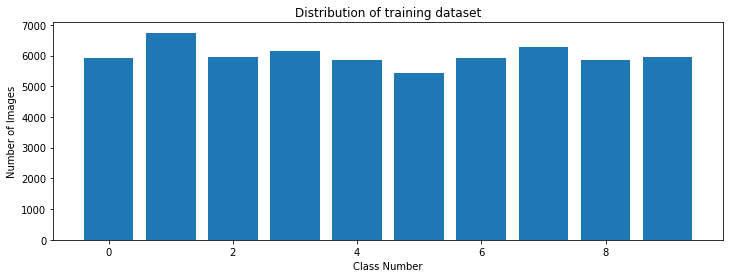

In [25]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of training dataset")
plt.xlabel("Class Number")
plt.ylabel("Number of Images")

In [26]:
# One hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [27]:
# Normalizing data
X_train = X_train/255
X_test = X_test/255

In [28]:
# Flatten into 1 dimensional array of pixels
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

In [29]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation="relu"))
    model.add(Dense(10, activation="relu"))
    model.add(Dense(num_classes, activation="softmax"))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [30]:
model = create_model()
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
None


In [31]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=200, verbose=1, shuffle=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 1s 9us/step - loss: 0.5274 - accuracy: 0.8372 - val_loss: 0.2796 - val_accuracy: 0.9195
Epoch 2/10
54000/54000 [==============================] - 0s 8us/step - loss: 0.3175 - accuracy: 0.9069 - val_loss: 0.2406 - val_accuracy: 0.9300
Epoch 3/10
54000/54000 [==============================] - 0s 7us/step - loss: 0.2883 - accuracy: 0.9170 - val_loss: 0.2211 - val_accuracy: 0.9342
Epoch 4/10
54000/54000 [==============================] - 0s 7us/step - loss: 0.2690 - accuracy: 0.9212 - val_loss: 0.2188 - val_accuracy: 0.9365
Epoch 5/10
54000/54000 [==============================] - 0s 7us/step - loss: 0.2618 - accuracy: 0.9242 - val_loss: 0.2200 - val_accuracy: 0.9358
Epoch 6/10
54000/54000 [==============================] - 0s 7us/step - loss: 0.2550 - accuracy: 0.9270 - val_loss: 0.2246 - val_accuracy: 0.9355
Epoch 7/10
54000/54000 [==============================] - 0s 7us/step - los

Text(0.5, 0, 'Epoch')

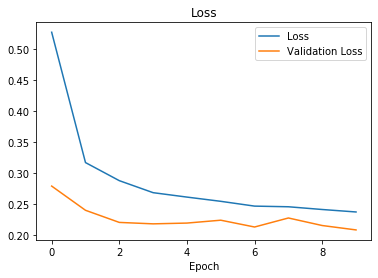

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
plt.title('Loss')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

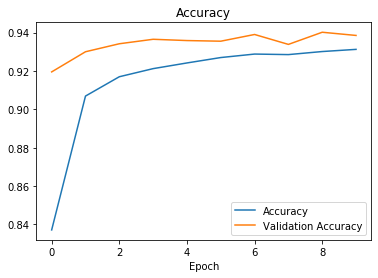

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Accuracy', 'Validation Accuracy'])
plt.title('Accuracy')
plt.xlabel('Epoch')

In [34]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Score:', score[0])
print('Test Accuracy', score[1])

Test Score: 0.25604245142936705
Test Accuracy 0.9287999868392944


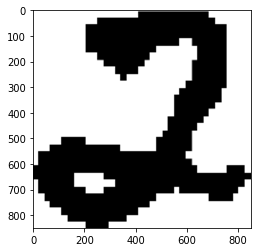

In [35]:
# Load Image
import requests
from PIL import Image
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img)

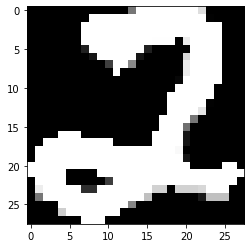

In [36]:
# Resize and Grayscale Image
import cv2
img_array = np.asarray(img)
resized = cv2.resize(img_array, (28,28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap=plt.get_cmap('gray'))

In [37]:
# Normalize and Flatten Image
image = image/255
image = image.reshape(1, 784)

In [38]:
prediction = model.predict_classes(image)
print('Predicted Digit:', str(prediction))

Predicted Digit: [3]
